# Prelude

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.interpolate import interp1d
from scipy.optimize import newton

In [5]:
from rough_heston_smile import calculate_rough_heston_smile
from params import params
from plotting import plot_variance_smile
from utils import lee_right

In [6]:
import warnings
warnings.filterwarnings('ignore', 'Casting complex values to real discards the imaginary part')

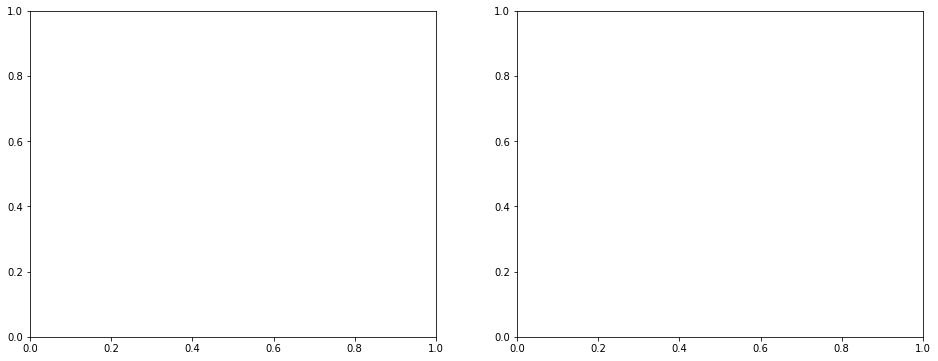

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# Reconciliation

## Heston with FGGS parameters

In [8]:
from heston_smile import calculate_heston_smile
from models.heston import heston_implied_variance_asymptotic, heston_critical_moment, heston_fourier_dampened_call
from models.black_scholes import bs_implied_vol

In [9]:
ps = {
    'ALPHA': 1,
    'V0': 0.0654,
    'VBAR': 0.0707,
    'LAMBDA': 0.6067,
    'XI': 0.2928,
    'RHO': -0.7571,
    'SPOT': 1,
    'RATE': 0,
}

In [10]:
ttm = 1
log_strikes = 0.5 + 1.5 * np.linspace(0, 1, 14 * 2)

In [11]:
calculate_heston_smile(ttm, log_strikes, ps)

In [12]:
critical_moment = heston_critical_moment(ttm, ps, x0=20)

In [13]:
plot_variance_smile(ax1, r"_output/smiles/heston.smile")

ax1.plot(log_strikes, lee_right(ttm, critical_moment) * log_strikes, linestyle='dashed', label="Lee Asymptotic")

ys2 = [heston_implied_variance_asymptotic(ttm, log_strike, ps) for log_strike in log_strikes]
ax1.plot(log_strikes, ys2, linestyle='dashed', label="3rd order asymptotic")

ax1.legend(frameon=False)
ax1.set_title("Classical Heston")

b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367
b1: 0.12556945056175878; b2: 0.021814964275936082; b3: 0.0004956570893223367

/Users/konstantinisstarovoitovs/projects/master/code/models/heston.py:193: RuntimeWarning: invalid value encountered in sqrt
  x1 = np.sqrt(b**2 + 2 * b * c * ps['RHO'] * s_plus + c**2 * s_plus * (1 - (1 - ps['RHO']**2) * s_plus))


Text(0.5, 1, 'Classical Heston')

## Rough Heston reconciliation

In [14]:
from models.rough_heston import rough_heston_cf_adams, rough_heston_implied_variance_asymptotic

In [15]:
ps = {
    'ALPHA': 0.99,
    'V0': 0.0654,
    'VBAR': 0.0707,
    'LAMBDA': 0.6067,
    'XI': 0.2928,
    'RHO': -0.7571,
    'SPOT': 1,
    'RATE': 0,
}

In [16]:
ttm = 1.2
n = 500

us = np.arange(31, 32, 0.1)
cts = []

for u in us:
    print(u)
    ys3 = rough_heston_cf_adams(-1j * u, ttm, ps, n, entire=True).real
    cts += [ttm * len(ys3) / n]

31.0
31.1
31.200000000000003
31.300000000000004
31.400000000000006
31.500000000000007
31.60000000000001
31.70000000000001
31.80000000000001
31.900000000000013


In [17]:
critical_time = interp1d(us, cts)
critical_moment = newton(lambda x: critical_time(x) - 1, 31.5)

print(critical_moment)

31.416666666666675


In [18]:
critical_moment = 31.416666666666675

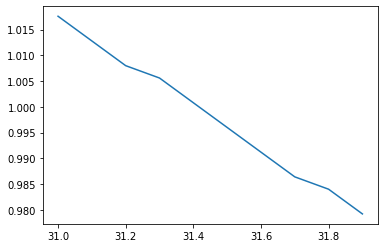

In [19]:
plt.plot(us, cts)
plt.show()

In [20]:
ttm = 1
log_strikes = 0.5 + 1.5 * np.linspace(0, 1, 14)

In [21]:
calculate_rough_heston_smile(ttm, log_strikes, ps)

Pricing for Log-strike: 0.6153846153846154
Pricing for Log-strike: 0.7307692307692308
Pricing for Log-strike: 0.5
Pricing for Log-strike: 0.8461538461538461
Pricing for Log-strike: 0.9615384615384616
Pricing for Log-strike: 1.1923076923076923
Pricing for Log-strike: 1.307692307692308
Pricing for Log-strike: 1.076923076923077
Pricing for Log-strike: 1.4230769230769231
Pricing for Log-strike: 1.5384615384615383
Pricing for Log-strike: 1.7692307692307694
Pricing for Log-strike: 1.8846153846153846
Pricing for Log-strike: 2.0
Pricing for Log-strike: 1.653846153846154
Log-strike: 1.1923076923076923; Price: 2.5461054757301405e-11; IV: 0.19478825276563608
Log-strike: 1.076923076923077; Price: 4.232614587891231e-10; IV: 0.1904371730696713
Log-strike: 0.5; Price: 0.00020654071804599388; IV: 0.1815889560092094
Log-strike: 0.8461538461538461; Price: 9.87482254659081e-08; IV: 0.18256112387559745
Log-strike: 0.6153846153846154; Price: 1.764203113771366e-05; IV: 0.1786613180687023
Log-strike: 1.65384

In [22]:
plot_variance_smile(ax2, r"_output/smiles/rough_heston__0.99.smile")

ys2 = [rough_heston_implied_variance_asymptotic(ttm, log_strike, ps, critical_time=critical_time, critical_moment=critical_moment)
       for log_strike in log_strikes]

ax2.plot(log_strikes, lee_right(ttm, critical_moment) * log_strikes, linestyle='dashed', label="1st order Asymptotic")
ax2.plot(log_strikes, ys2, linestyle='dashed', label="3rd order asymptotic")

ax2.legend(frameon=False)
ax2.set_title(r"Rough Heston $\alpha=0.99$")

b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035
b1: 0.12717532919768323; b2: 0.02302493357400585; b3: -0.0010233119689266035

Text(0.5, 1, 'Rough Heston $\\alpha=0.99$')

In [23]:
fig.savefig(r"_output/reconciliation.pdf", bbox_inches = 'tight')

# Rough Heston FGGS 0.75

In [24]:
ps = {
    'ALPHA': 0.75,
    'V0': 0.0654,
    'VBAR': 0.0707,
    'LAMBDA': 0.6067,
    'XI': 0.2928,
    'RHO': -0.7571,
    'SPOT': 1,
    'RATE': 0,
}

In [25]:
ttm = 1.2
n = 500

us = np.arange(27, 28, 0.1)
cts = []

for u in us:
    print(u)
    ys3 = rough_heston_cf_adams(-1j * u, ttm, ps, n, entire=True).real
    cts += [ttm * len(ys3) / n]

27.0
27.1
27.200000000000003
27.300000000000004
27.400000000000006
27.500000000000007
27.60000000000001
27.70000000000001
27.80000000000001
27.900000000000013


In [26]:
critical_time = interp1d(us, cts)
critical_moment = newton(lambda x: critical_time(x) - 1, 27.5)

print(critical_moment)

27.377777777777787


In [27]:
critical_moment = 27.377777777777787

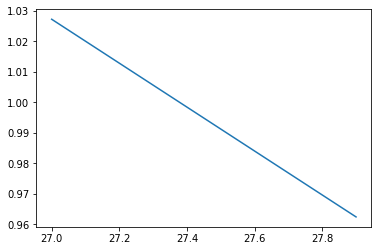

In [28]:
plt.plot(us, cts)
plt.show()

In [29]:
ttm = 1
log_strikes = 1 + 3 * np.linspace(0, 1, 14)

In [30]:
calculate_rough_heston_smile(ttm, log_strikes, ps, damp=24.)

Pricing for Log-strike: 1.4615384615384617
Pricing for Log-strike: 1.0
Pricing for Log-strike: 1.2307692307692308
Pricing for Log-strike: 1.9230769230769231
Pricing for Log-strike: 1.6923076923076923
Pricing for Log-strike: 2.153846153846154
Pricing for Log-strike: 2.3846153846153846
Pricing for Log-strike: 2.615384615384616
Pricing for Log-strike: 2.8461538461538463
Pricing for Log-strike: 3.0769230769230766
Pricing for Log-strike: 3.5384615384615388
Pricing for Log-strike: 3.307692307692308
Pricing for Log-strike: 3.769230769230769
Pricing for Log-strike: 4.0
Log-strike: 3.5384615384615388; Price: 7.336302146468444e-30; IV: 0.31793282787894256
Log-strike: 3.0769230769230766; Price: 4.560107516256719e-25; IV: 0.305203962381759
Log-strike: 2.615384615384616; Price: 2.4009783721856827e-20; IV: 0.29273909114983426
Log-strike: 4.0; Price: 1.0437965498940774e-34; IV: 0.3305912083104979
Log-strike: 2.8461538461538463; Price: 1.0724330440564282e-22; IV: 0.29890563133428005
Log-strike: 3.3076

b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584
b1: 0.13639772029160543; b2: 0.02099262118264226; b3: -0.0010574203758192584

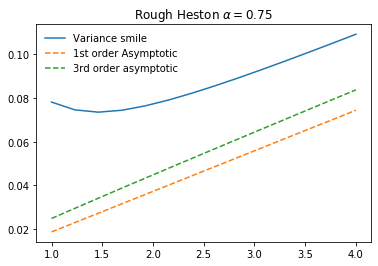

In [31]:
fig, ax = plt.subplots()

plot_variance_smile(ax, r"_output/smiles/rough_heston__0.75.smile")

ys2 = [rough_heston_implied_variance_asymptotic(ttm, log_strike, ps, critical_time=critical_time, critical_moment=critical_moment)
       for log_strike in log_strikes]

ax.plot(log_strikes, lee_right(ttm, critical_moment) * log_strikes, linestyle='dashed', label="1st order Asymptotic")
ax.plot(log_strikes, ys2, linestyle='dashed', label="3rd order asymptotic")

ax.legend(frameon=False)
ax.set_title(r"Rough Heston $\alpha = 0.75$")

fig.savefig("_output/asymptotic.pdf", bbox_inches = 'tight')